In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression, LogisticRegression,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz 
from sklearn.metrics import mean_squared_error, accuracy_score

In [18]:
with open("../db/df.pkl", 'rb') as f:
    df = pickle.load(f)

In [23]:
df.columns

Index(['Price', 'Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Stadium', 'Town_Bangalore', 'Town_Chennai', 'Town_Delhi',
       'Town_Hyderabad', 'Town_Kolkata', 'Town_Mumbai', 'KMeans5'],
      dtype='object')

In [8]:
stuff = list()
for i in df['KMeans5'].unique():
        stuff.append(df[df['KMeans5']==i])

In [10]:
stuff[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 26641
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2085 non-null   int64  
 1   Area                 2085 non-null   int64  
 2   No. of Bedrooms      2085 non-null   int64  
 3   Resale               2085 non-null   int64  
 4   MaintenanceStaff     2085 non-null   int64  
 5   Gymnasium            2085 non-null   int64  
 6   SwimmingPool         2085 non-null   int64  
 7   LandscapedGardens    2085 non-null   int64  
 8   JoggingTrack         2085 non-null   int64  
 9   RainWaterHarvesting  2085 non-null   int64  
 10  IndoorGames          2085 non-null   int64  
 11  ShoppingMall         2085 non-null   int64  
 12  Intercom             2085 non-null   int64  
 13  SportsFacility       2085 non-null   int64  
 14  ATM                  2085 non-null   int64  
 15  ClubHouse            2085 non-null   int64

In [12]:
stuff[1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7665 entries, 1 to 26638
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                7665 non-null   int64  
 1   Area                 7665 non-null   int64  
 2   No. of Bedrooms      7665 non-null   int64  
 3   Resale               7665 non-null   int64  
 4   MaintenanceStaff     7665 non-null   int64  
 5   Gymnasium            7665 non-null   int64  
 6   SwimmingPool         7665 non-null   int64  
 7   LandscapedGardens    7665 non-null   int64  
 8   JoggingTrack         7665 non-null   int64  
 9   RainWaterHarvesting  7665 non-null   int64  
 10  IndoorGames          7665 non-null   int64  
 11  ShoppingMall         7665 non-null   int64  
 12  Intercom             7665 non-null   int64  
 13  SportsFacility       7665 non-null   int64  
 14  ATM                  7665 non-null   int64  
 15  ClubHouse            7665 non-null   int64

In [13]:
stuff[2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 99 to 26637
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                313 non-null    int64  
 1   Area                 313 non-null    int64  
 2   No. of Bedrooms      313 non-null    int64  
 3   Resale               313 non-null    int64  
 4   MaintenanceStaff     313 non-null    int64  
 5   Gymnasium            313 non-null    int64  
 6   SwimmingPool         313 non-null    int64  
 7   LandscapedGardens    313 non-null    int64  
 8   JoggingTrack         313 non-null    int64  
 9   RainWaterHarvesting  313 non-null    int64  
 10  IndoorGames          313 non-null    int64  
 11  ShoppingMall         313 non-null    int64  
 12  Intercom             313 non-null    int64  
 13  SportsFacility       313 non-null    int64  
 14  ATM                  313 non-null    int64  
 15  ClubHouse            313 non-null    int64

In [14]:
stuff[3].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 805 to 26557
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                26 non-null     int64  
 1   Area                 26 non-null     int64  
 2   No. of Bedrooms      26 non-null     int64  
 3   Resale               26 non-null     int64  
 4   MaintenanceStaff     26 non-null     int64  
 5   Gymnasium            26 non-null     int64  
 6   SwimmingPool         26 non-null     int64  
 7   LandscapedGardens    26 non-null     int64  
 8   JoggingTrack         26 non-null     int64  
 9   RainWaterHarvesting  26 non-null     int64  
 10  IndoorGames          26 non-null     int64  
 11  ShoppingMall         26 non-null     int64  
 12  Intercom             26 non-null     int64  
 13  SportsFacility       26 non-null     int64  
 14  ATM                  26 non-null     int64  
 15  ClubHouse            26 non-null     int64

In [15]:
stuff[4].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 26143 to 26218
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                4 non-null      int64  
 1   Area                 4 non-null      int64  
 2   No. of Bedrooms      4 non-null      int64  
 3   Resale               4 non-null      int64  
 4   MaintenanceStaff     4 non-null      int64  
 5   Gymnasium            4 non-null      int64  
 6   SwimmingPool         4 non-null      int64  
 7   LandscapedGardens    4 non-null      int64  
 8   JoggingTrack         4 non-null      int64  
 9   RainWaterHarvesting  4 non-null      int64  
 10  IndoorGames          4 non-null      int64  
 11  ShoppingMall         4 non-null      int64  
 12  Intercom             4 non-null      int64  
 13  SportsFacility       4 non-null      int64  
 14  ATM                  4 non-null      int64  
 15  ClubHouse            4 non-null      int6

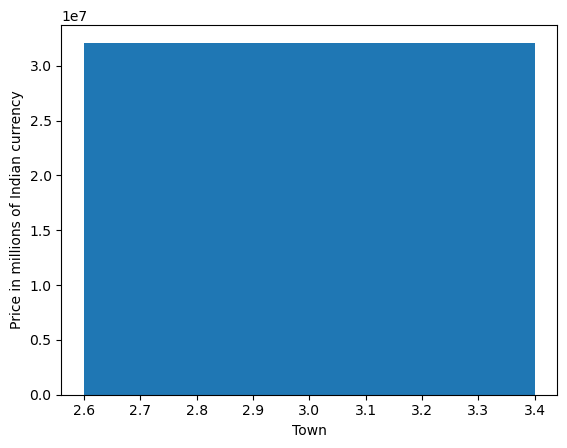

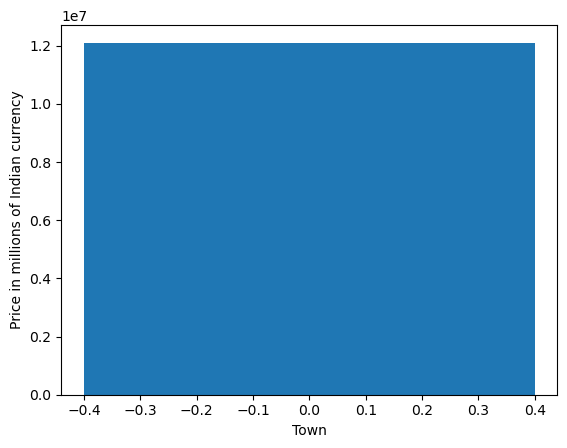

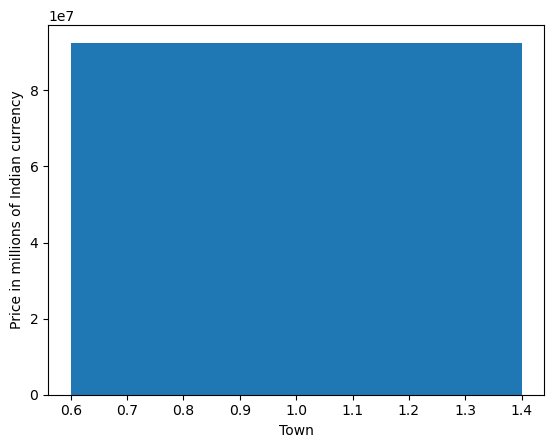

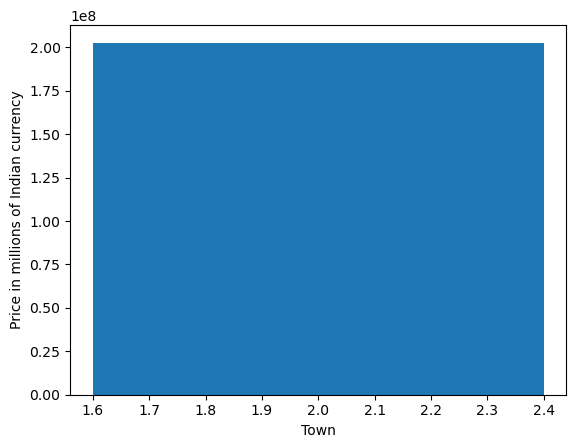

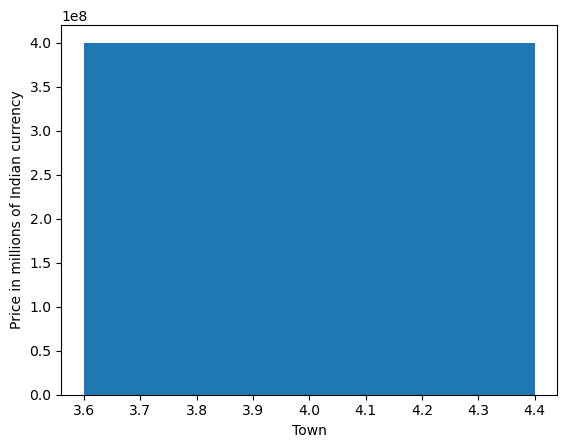

In [29]:
for i in stuff:
    plt.bar(i['KMeans5'],i['Price'])
    plt.ylabel('Price in millions of Indian currency')
    plt.xlabel('Town')
    plt.show()